# Conference


RE-RUN and make sure to record the initial Conditions dumy! $\checkmark$

MORE DAYS!!!

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
########################################################
#################################### Personal Packages # 
sys.dont_write_bytecode = True
import Orbit_Calc as OBC 
gradient_cmap = OBC.ColrBlind_Palette(Direction=0)
########################################
################################### PATH 
# MASCON I
Aster_M1CM_PATH  = 'Asteroid_Database/Asteroid_CM/MASCON1/'
Aster_VolM1_PATH = 'Asteroid_Database/Asteroid_CM/MASCON1/Tetra_Vol/'
# MASCON III
Aster_M3CM_PATH  = 'Asteroid_Database/Asteroid_CM/MASCON3/'
Aster_VolM3_PATH = 'Asteroid_Database/Asteroid_CM/MASCON3/Tetra_Pris_Vol/'
# MASCON VIII
Aster_M8CM_PATH  = 'Asteroid_Database/Asteroid_CM/MASCON8/'
Aster_VolM8_PATH = 'Asteroid_Database/Asteroid_CM/MASCON8/Tetra_Pris_Vol/'
# OBJ & Constant
Aster_OBJ_PATH   = 'Asteroid_Database/OBJ_Files/'
Aster_Const_PATH = 'Asteroid_Database/Asteroid_Constants/' 
# Saving in Databank
Aster_Sim_Data_PATH = 'Databank/Asteroid_Sim_Data/'
#################################################
#################################################
####### Enter Asteroid Name & Update Here #######
Asteroid_Name = '1950DA_Prograde'
##################################################
########### Load File ############################
Aster_File_CM   = Aster_M1CM_PATH + Asteroid_Name + "_CM.dat"
Aster_File_OBJ  = Aster_OBJ_PATH  + Asteroid_Name + ".obj"
Aster_CM  = np.loadtxt(Aster_File_CM, delimiter=' ')
Aster_File_Const = Aster_Const_PATH + Asteroid_Name + '_const.in'        
Asteroid_Const = pd.read_csv(Aster_File_Const, delimiter=' ')
########################################################
PATH = 'Databank/Conference/Orbit_Sim_Data/'
PATH_NEW = 'Databank/Conference/Fixed_Bounded/'

Bounded = pd.read_csv(PATH + 'bounded_same_dt50s_Conf_SimData.dat', delimiter=' ')
Collision = pd.read_csv(PATH + 'C(9666.051539477168)y0=2.0H=1e-06_.dat', delimiter=' ')  
Escape = pd.read_csv(PATH + 'E(70947.55513755506)y0=1.0H=8e-06_.dat', delimiter=' ')


NEW_Bound = pd.read_csv(PATH_NEW + 'trajy0=3.0H=3e-06_.dat', delimiter=' ')

Sphere = pd.read_csv(PATH_NEW + 'Spherey0=3.0H=3e-06_.dat', delimiter=' ')

print(Bounded)
print(Collision)
print(Escape)
Bounded_2 = pd.read_csv(PATH + 'y_3.0km_h_4_60D_Conf_SimData.dat', delimiter=' ')
########################################################
Scale = Asteroid_Const['Scaling'][0]
radius = Asteroid_Const['Mean Radius (km)'][0]
########################################################
Mesh_Color = '#44AA99'
from mpl_toolkits.mplot3d.art3d import Poly3DCollection 
def OBJ_2_Mesh(Asteroid_Name,scale,Mesh_color):
    """ This reads in .obj files and creates the face mesh
     That is used for plotting around the Center of Masses
     
    Args:
        Asteroid_Name (.obj file):  Asteroid Shape model File
        
        scale               flaot:  Scale for asteroid in 
                                    kilometers. 1 if no scaling.
                                    
        color              string:  Plot color for edges of mesh
    Returns:
        Mesh: Asteroid face mesh 
    """
    #######################
    # Load data file      ###################################### 
    data = np.loadtxt(Asteroid_Name, delimiter=' ', dtype=str) #
    ############################################################
    ###############################################################
    # Set Vertex/Faces denotaed as v or f in .obj format to array #
    vertex_faces = data[:,0]                                      #
    # Get Length of the Vertex/Faces array for range counting     #
    V_F_Range = vertex_faces.size                                 #
    # Define varibale for number of vertices & faces              #
    numb_vert = 0                                                 #
    numb_face = 0                                                 #
    # Scan Data for v & f and count the numbers of each.          #
    #  Used for sorting x, y, & z as vertices                     #
    for i in range(0,V_F_Range):                                  #
        if vertex_faces[i] == 'v':                                #
            numb_vert += 1                                        #
        else:                                                     #
            numb_face += 1                                        #
    ###############################################################
    #########################
    # Assigning Vertex Data #
    #########################
    # Vertex data assigned to x, y, & z
    #  then cpnverts to float type
    ########################################
    # Assign 2nd row of .txt as x input    #
    x_input = data[range(0,numb_vert),1]   #
    # Assign 3rd row of .txt as y input    #
    y_input = data[range(0,numb_vert),2]   #
    # Assign 4th row of .txt as z input    #
    z_input = data[range(0,numb_vert),3]   #
    # Convert Vertices data to float type  #
    x_0 = x_input.astype(float)            #
    y_0 = y_input.astype(float)            #
    z_0 = z_input.astype(float)            #
    ########################################
    #
    ##############################################
    # Fill zero indecies with dummy values       #
    #  to allow faces to call vertices 1 to 1014 #
    x = np.append(0,x_0)  ########################
    y = np.append(0,y_0)  #
    z = np.append(0,z_0)  #
    #######################
    #
    #######################
    # Assigning Face Data #
    #######################
    # Face data assigned to fx, fy, & fz
    #  then cpnverts to float type
    #############################################
    # Range count for face data                 #
    row_tot = numb_face + numb_vert             #
    # Assign 2nd row of .txt as x input         #
    fx_input = data[range(numb_vert,row_tot),1] #
    # Assign 3rd row of .txt as y input         #
    fy_input = data[range(numb_vert,row_tot),2] #
    # Assign 4th row of .txt as z input         #
    fz_input = data[range(numb_vert,row_tot),3] #
    # Convert Vertices data to float type       #
    fx = fx_input.astype(int)                   #
    fy = fy_input.astype(int)                  #
    fz = fz_input.astype(int)                 #
    ##########################################
    #
    ##########################
    # Creating Output Arrays #
    ##########################
    #    Number of Vertex is (N-1)             
    #     numb_vert += 1
    #########################################
    # Number of Vertex set to array         #
    numb_vert_array = []                    #
    numb_vert_array.append(numb_vert)       #
    # Number of Faces set to array          #
    numb_face_array = []                    #
    numb_face_array.append(numb_face)       #
    # Stacking Columns of Vertex Data       #################
    Vert_Data_Out_0 = np.column_stack((x, y))               #
    Vert_Data       = np.column_stack((Vert_Data_Out_0, z)) #
    # Stacking Columns of Face Data                         #
    Face_Data_Out_0 = np.column_stack((fx,fy))              #
    Face_Data       = np.column_stack((Face_Data_Out_0,fz)) #
    #########################################################
    Vert_Data_mesh = Vert_Data*scale
    ##:)                                                 
    # Let's put a Happy little Asteroid right in there        
    Asteroid_Mesh = Poly3DCollection([Vert_Data_mesh[ii] for ii in Face_Data], 
                            edgecolor=Mesh_color,
                            facecolors="white",
                            linewidth=0.75,
                            alpha=0.0)
    ######################################
    return Asteroid_Mesh
def plot_4by4(SimData):
    # Axis limit 
    # axes[1, 0].set_ylim([-0.05, 0.05])
    X = SimData['Position Vec. X']
    Y = SimData['Position Vec. Y']
    Z = SimData['Position Vec. Z']
    V_mag = np.sqrt(SimData['Velocity Vec. X']**2 + SimData['Velocity Vec. Y']**2 + SimData['Velocity Vec. Z']**2)
    # Corrected subplot creation
    fig, axes = plt.subplots(2, 2, figsize=(20, 20), subplot_kw={'projection': '3d'})
    axis0 = axes[0, 0]
    line_color ='#332288'
    ############################################################################
    # 3D Plot with V_mag as color
    scatter = axis0.scatter(X, Y, Z, c=V_mag, cmap=gradient_cmap,s=0.1)
    cbar = fig.colorbar(scatter, ax=axis0, shrink=0.5, aspect=20)  
    cbar.set_label(r'$V (km/s)$', fontsize=25,labelpad=20) 
    axis0.view_init(elev=30, azim=45)   
    axis0.set_xlabel(r'$X (km)$', fontsize=25,labelpad=20)
    axis0.set_ylabel(r'$Y (km)$', fontsize=25,labelpad=20)
    axis0.set_zlabel(r'$Z (km)$', fontsize=25,labelpad=25)
    axis0.tick_params(axis='x', labelsize=20) 
    axis0.tick_params(axis='y', labelsize=20) 
    axis0.tick_params(axis='z', labelsize=20) 
    ############################################################################
    # Convert the rest of the axes back to 2D for the remaining plots
    for ax in axes.flat[1:]:
        ax.remove()
    axes[0, 1] = fig.add_subplot(2, 2, 2)
    axes[1, 0] = fig.add_subplot(2, 2, 3)
    axes[1, 1] = fig.add_subplot(2, 2, 4)
    # X-Y Plot
    axes[0, 1].plot(X, Y, color=line_color,linewidth=0.05)
    axes[0, 1].set_title("X-Y", fontsize=25)
    axes[0, 1].set_xlabel(r'$X (km)$', fontsize=25,labelpad=20)
    axes[0, 1].set_ylabel(r'$Y (km)$', fontsize=25,labelpad=20)
    axes[0, 1].tick_params(axis='x', labelsize=20) 
    axes[0, 1].tick_params(axis='y', labelsize=20) 
    ############################################################################
    # Y-Z Plot
    axes[1, 0].plot(Y, Z, color=line_color,linewidth=0.05)
    axes[1, 0].set_title("Y-Z", fontsize=25)
    axes[1, 0].set_xlabel(r'$Y (km)$', fontsize=25,labelpad=20)
    axes[1, 0].set_ylabel(r'$Z (km)$', fontsize=25,labelpad=20)
    axes[1, 0].tick_params(axis='x', labelsize=20) 
    axes[1, 0].tick_params(axis='y', labelsize=20) 
    ############################################################################
    # X-Z Plot
    axes[1, 1].plot(X, Z, color=line_color,linewidth=0.05)
    axes[1, 1].set_title("X-Z", fontsize=25)
    axes[1, 1].set_xlabel(r'$X (km)$', fontsize=25,labelpad=20)
    axes[1, 1].set_ylabel(r'$Z (km)$', fontsize=25,labelpad=20)
    axes[1, 1].tick_params(axis='x', labelsize=20) 
    axes[1, 1].tick_params(axis='y', labelsize=20) 
    ############################################################################
    plt.tight_layout()
    plt.show()
def plot_Single(SimData):
    X = SimData['Position Vec. X']
    Y = SimData['Position Vec. Y']
    Z = SimData['Position Vec. Z']
    V_mag = np.sqrt(SimData['Velocity Vec. X']**2 + SimData['Velocity Vec. Y']**2 + SimData['Velocity Vec. Z']**2)
    # Corrected subplot creation
    fig = plt.figure(figsize=(30, 30))
    axis = fig.add_subplot(111, projection='3d')
    line_color ='#332288'
    ############################################################################
    # 3D Plot with V_mag as color
    Asteroid_Mesh = OBJ_2_Mesh(Aster_File_OBJ,Scale,Mesh_Color)
    axis.add_collection3d(Asteroid_Mesh)
    axis.plot(X, Y, Z, color=line_color,linewidth=0.01)
    axis.view_init(elev=30, azim=80)   
    axis.set_xlabel(r'$X (km)$', fontsize=35,labelpad=25)
    axis.set_ylabel(r'$Y (km)$', fontsize=35,labelpad=25)
    axis.set_zlabel(r'$Z (km)$', fontsize=35,labelpad=25)
    axis.tick_params(axis='x', labelsize=30) 
    axis.tick_params(axis='y', labelsize=30) 
    axis.tick_params(axis='z', labelsize=30) 
    axis.set_aspect('equal', 'box') 
    axis.xaxis.set_pane_color((0.0, 0.0,0.0, 0.0))  
    axis.yaxis.set_pane_color((0.0, 0.0,0.0, 0.0))  
    axis.zaxis.set_pane_color((0.0, 0.0,0.0, 0.0))
    axis.grid(False)
    plt.show()
def plot_Sphere(SimData,radius):
    X = SimData['Position Vec. X']
    Y = SimData['Position Vec. Y']
    Z = SimData['Position Vec. Z']
    V_mag = np.sqrt(SimData['Velocity Vec. X']**2 + SimData['Velocity Vec. Y']**2 + SimData['Velocity Vec. Z']**2)
    # Corrected subplot creation
    fig = plt.figure(figsize=(30, 30))
    axis = fig.add_subplot(111, projection='3d')
    line_color ='#332288'
    ############################################################################
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ############################################################################
    axis.plot(X, Y, Z, color=line_color,linewidth=0.01)
    axis.plot_surface(x, y, z, color=Mesh_Color)
    axis.view_init(elev=30, azim=80)   
    axis.set_xlabel(r'$X (km)$', fontsize=35,labelpad=25)
    axis.set_ylabel(r'$Y (km)$', fontsize=35,labelpad=25)
    axis.set_zlabel(r'$Z (km)$', fontsize=35,labelpad=25)
    axis.tick_params(axis='x', labelsize=30) 
    axis.tick_params(axis='y', labelsize=30) 
    axis.tick_params(axis='z', labelsize=30) 
    axis.set_aspect('equal', 'box') 
    axis.xaxis.set_pane_color((0.0, 0.0,0.0, 0.0))  
    axis.yaxis.set_pane_color((0.0, 0.0,0.0, 0.0))  
    axis.zaxis.set_pane_color((0.0, 0.0,0.0, 0.0))
    axis.grid(False)
    plt.show()

0
        Position Vec. X  Position Vec. Y  Position Vec. Z  Velocity Vec. X  \
0              0.000000         3.000000     0.000000e+00         0.010930   
1              0.543495         2.950357    -4.755708e-08         0.010749   
2              1.069002         2.803073    -1.877152e-07         0.010213   
3              1.559130         2.563020    -4.173626e-07         0.009338   
4              1.997656         2.238146    -7.345805e-07         0.008154   
...                 ...              ...              ...              ...   
103696         2.390637         1.157297    -2.131783e-02         0.004189   
103697         2.559695         0.707020    -2.132497e-02         0.002555   
103698         2.644755         0.233726    -2.133197e-02         0.000838   
103699         2.643062        -0.247058    -2.133881e-02        -0.000906   
103700         2.554703        -0.719565    -2.134552e-02        -0.002619   

        Velocity Vec. Y  Velocity Vec. Z  
0              0.0

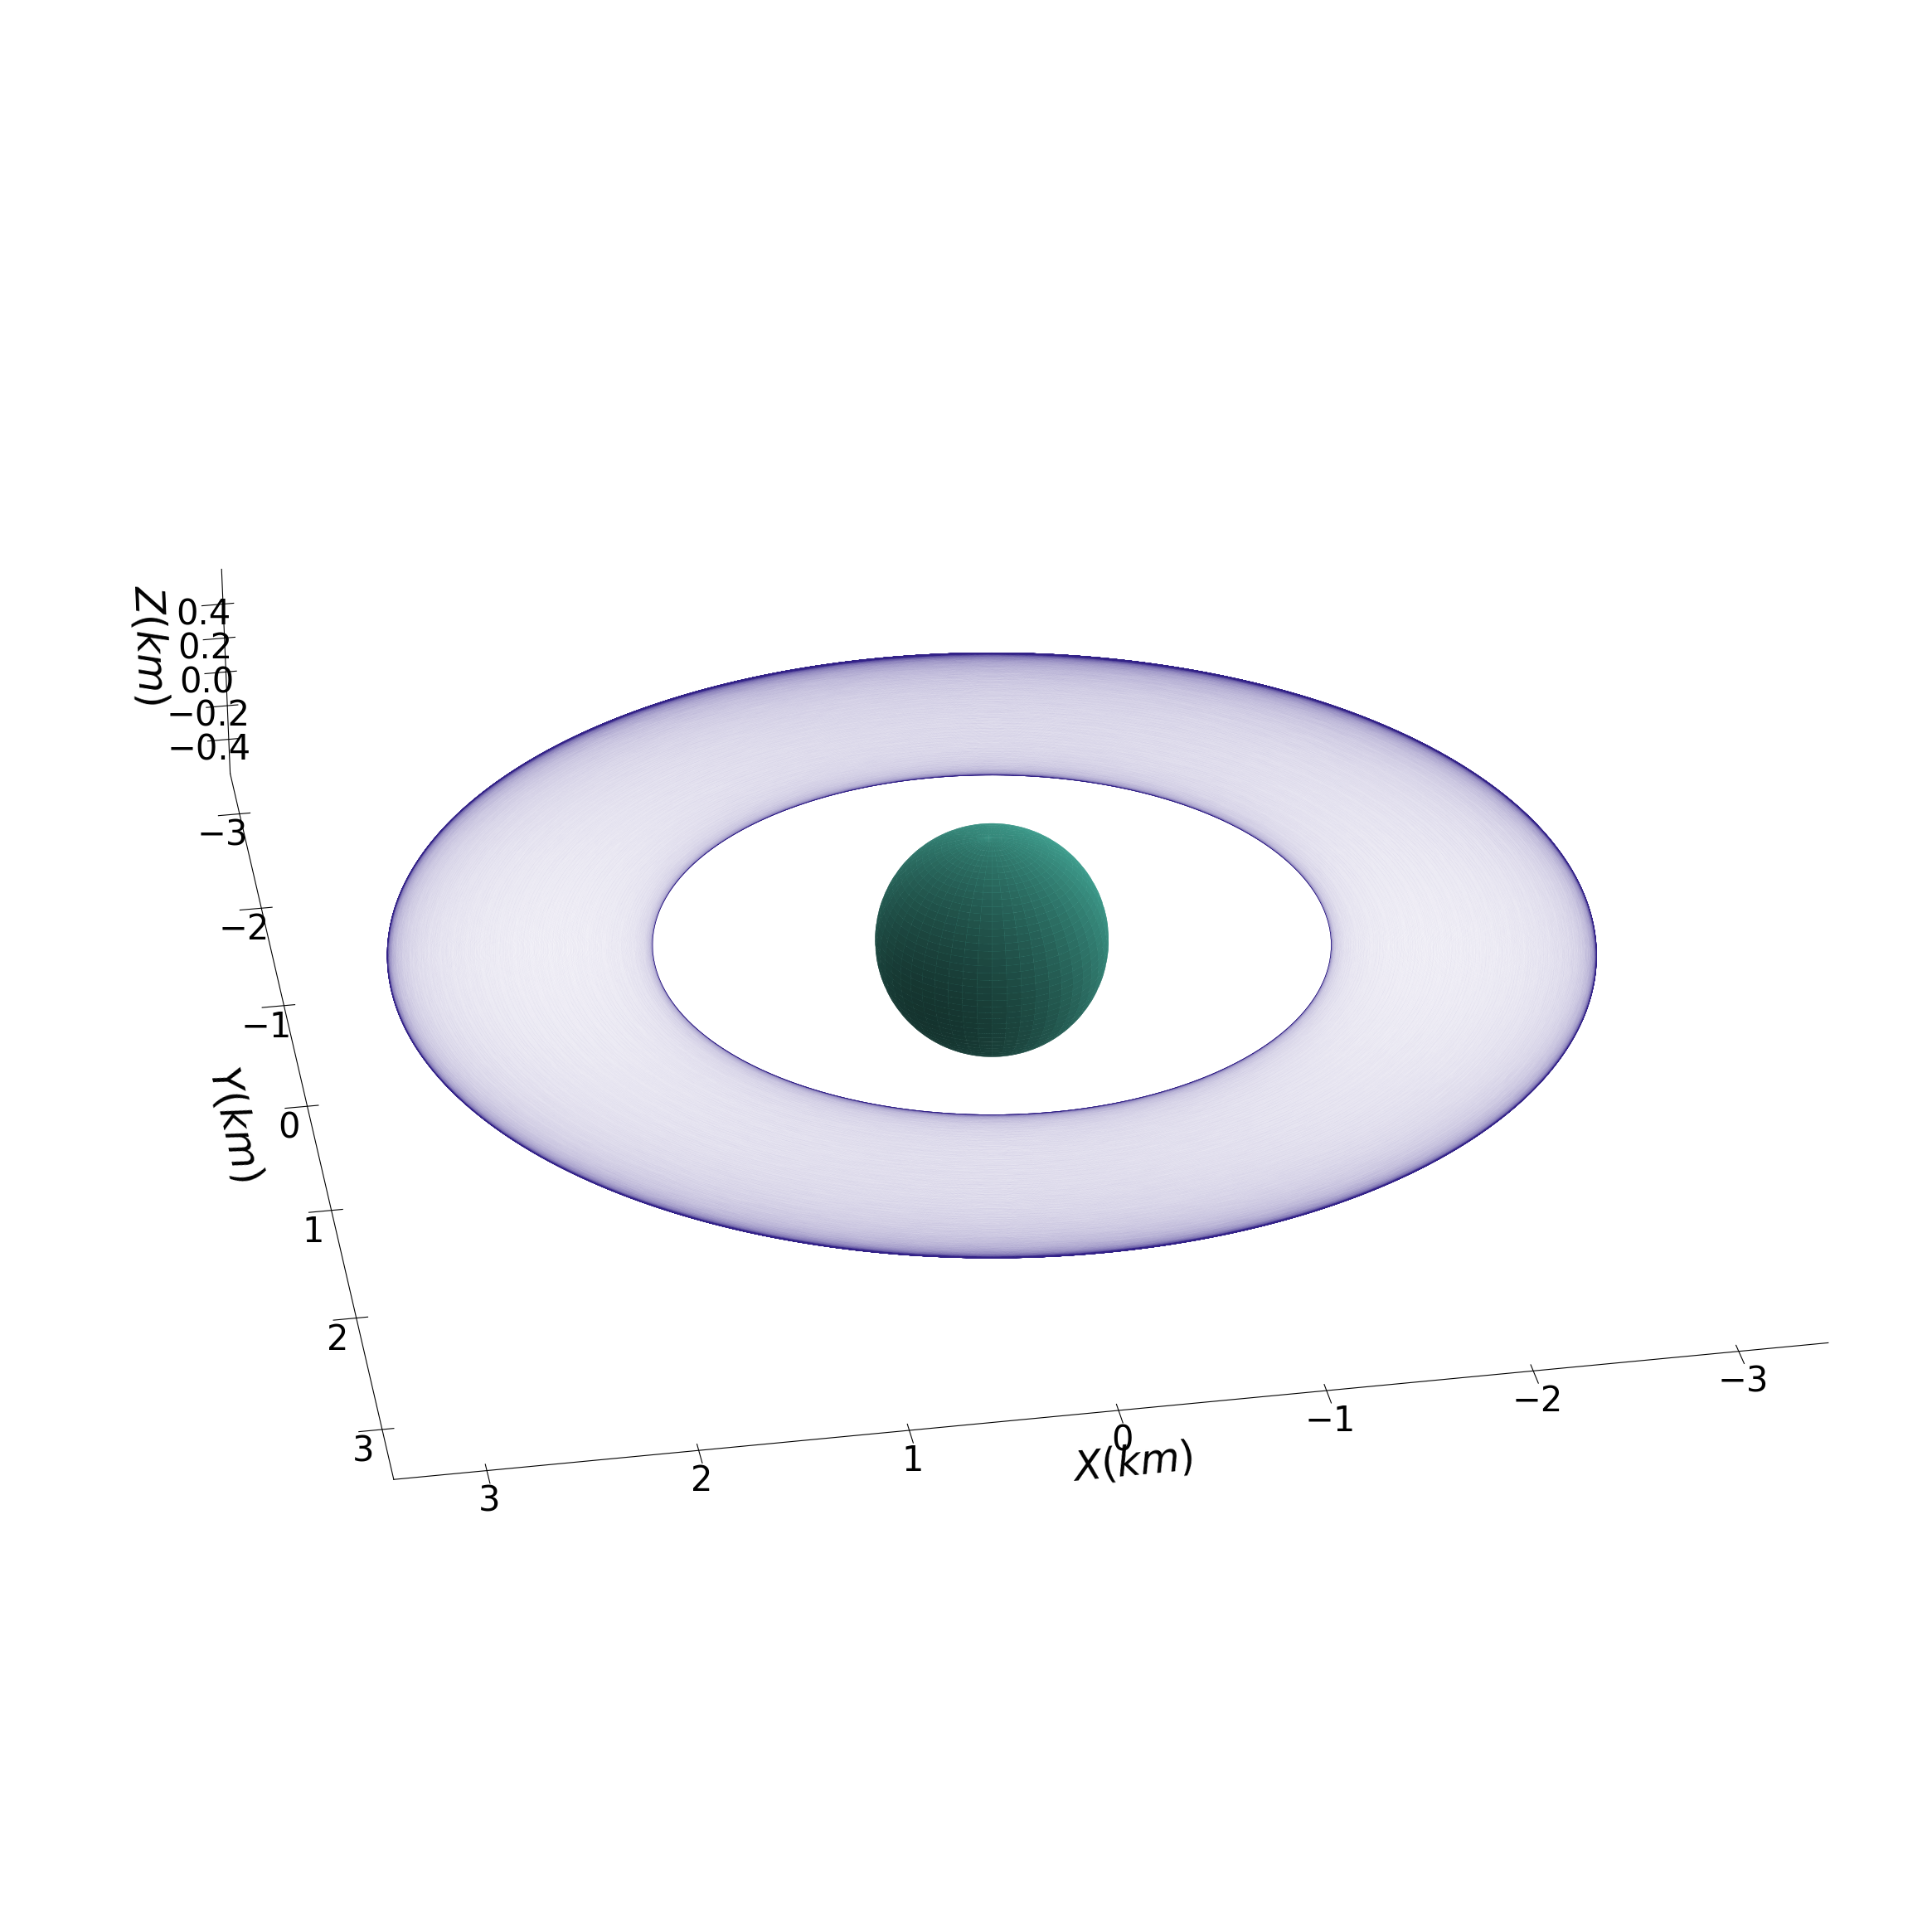

In [8]:
plot_Sphere(Sphere,radius)

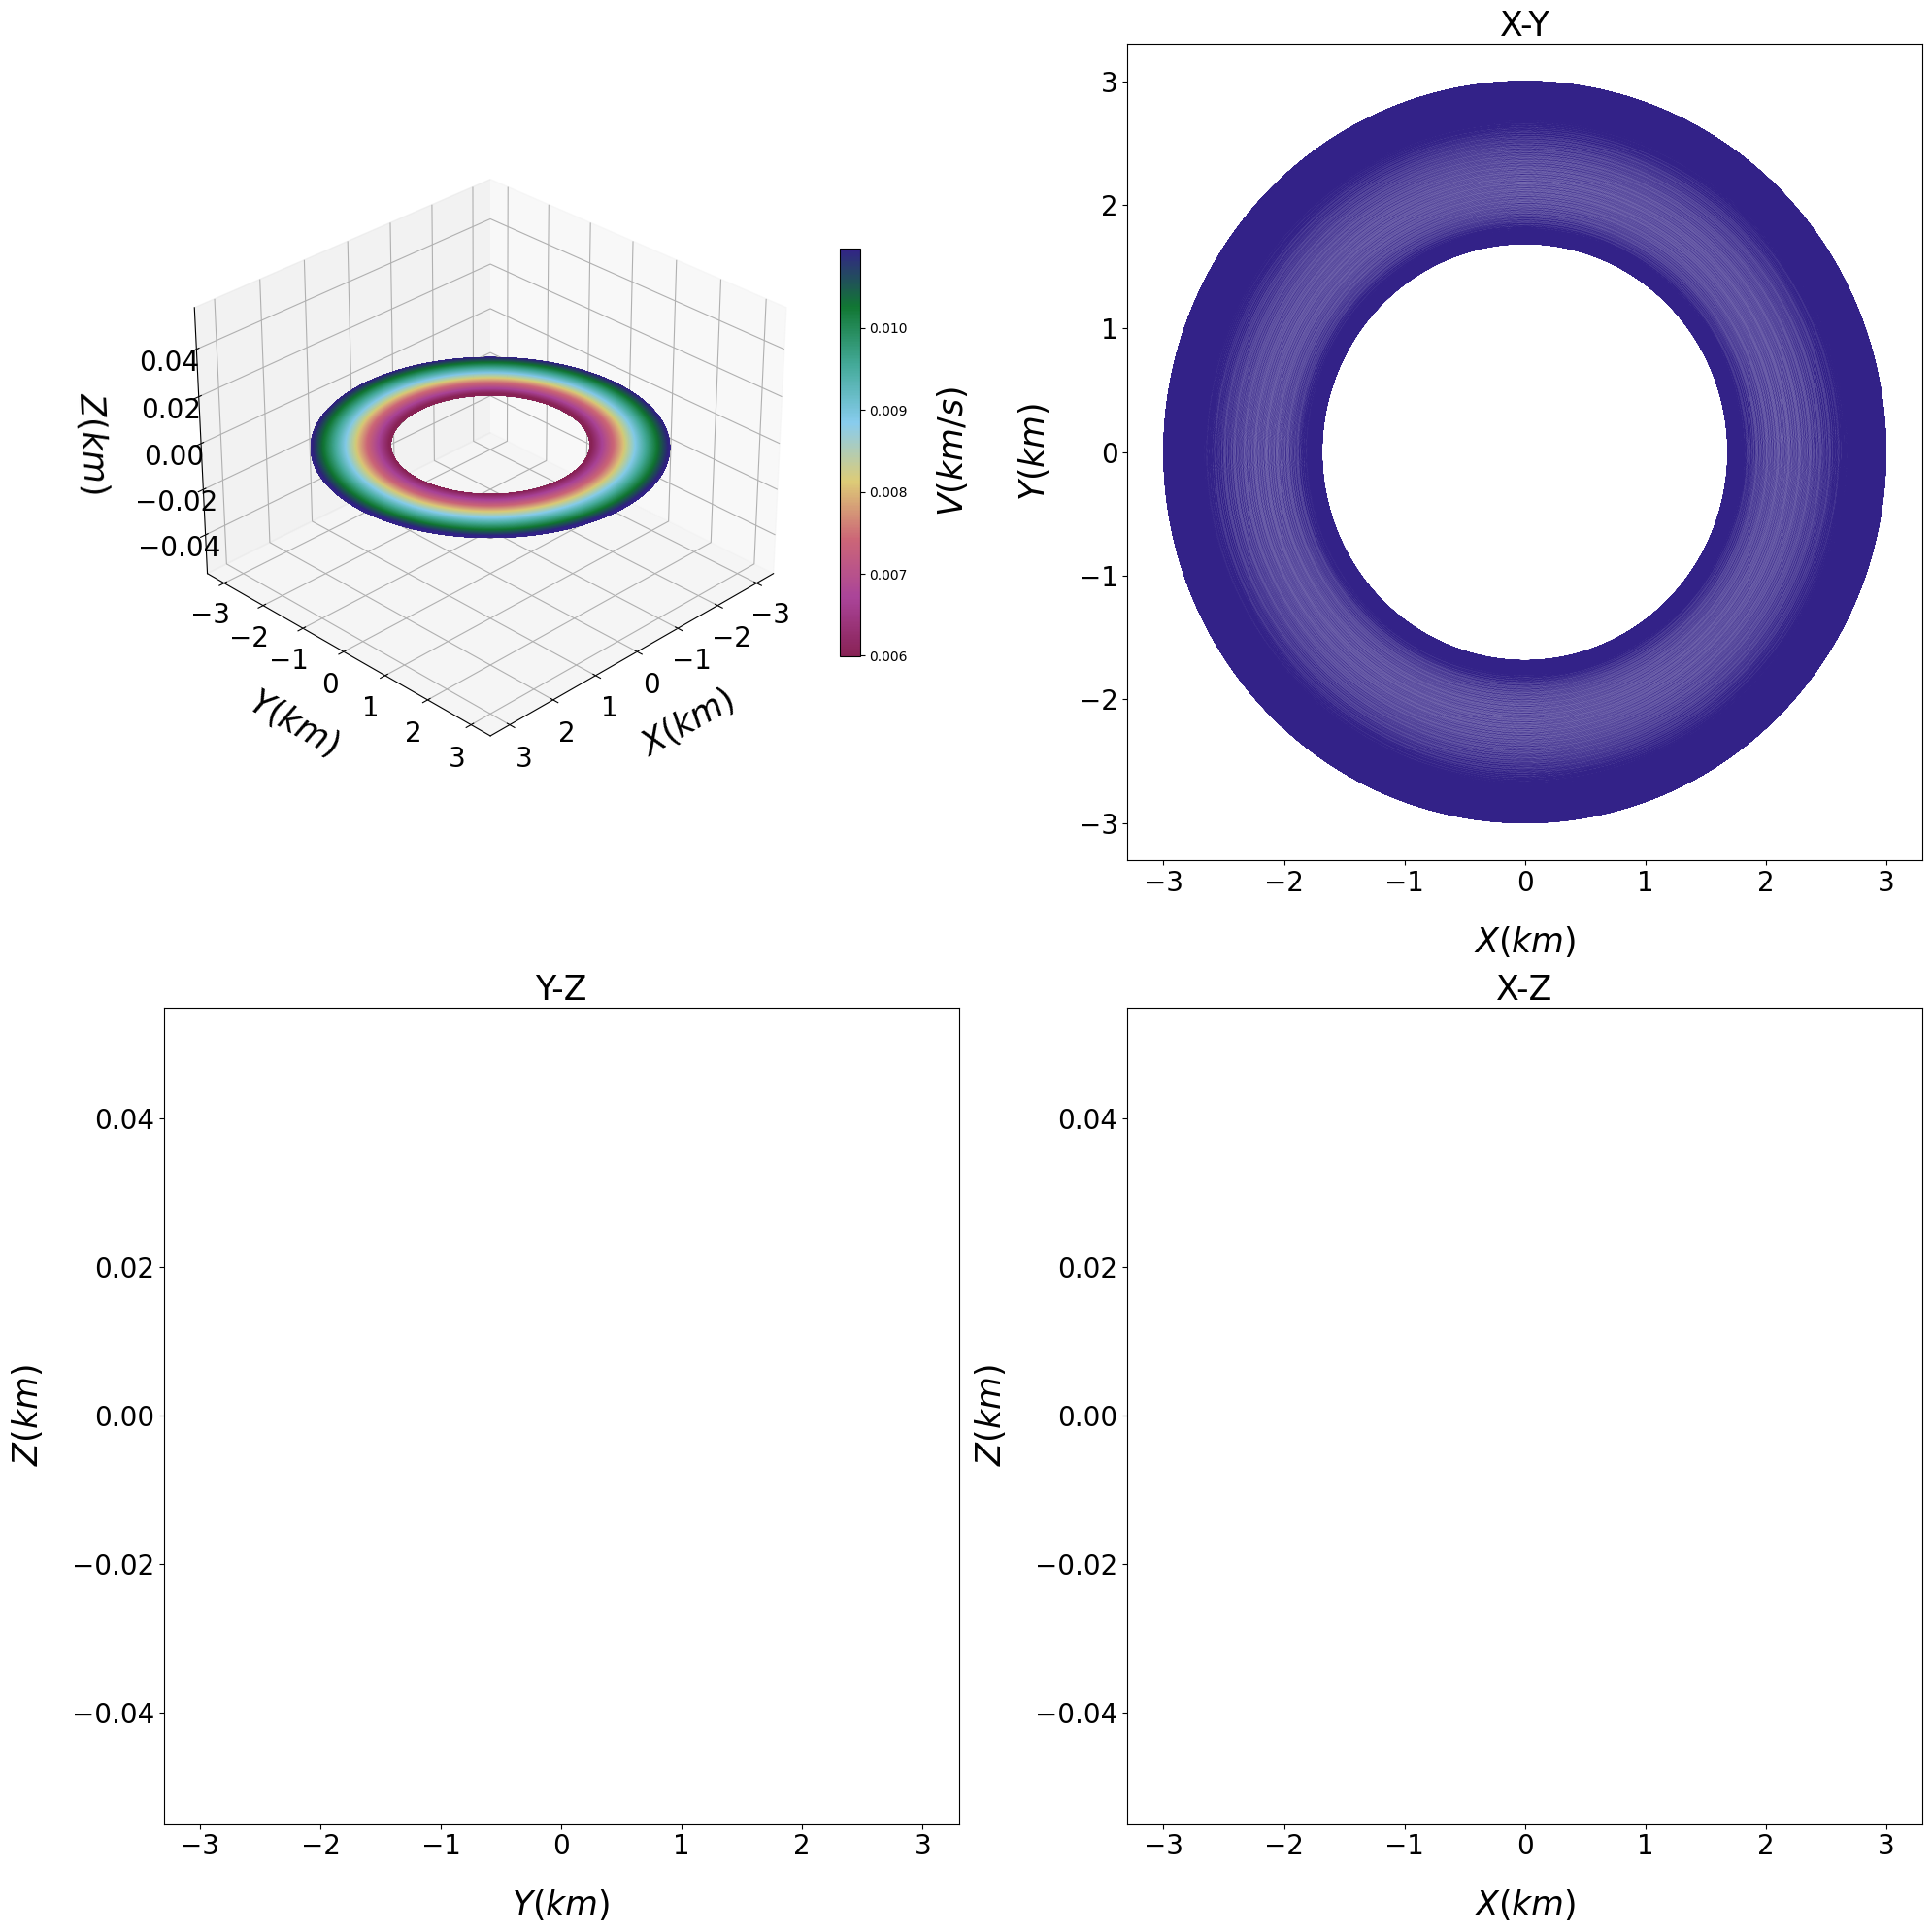

In [4]:
plot_4by4(Sphere)

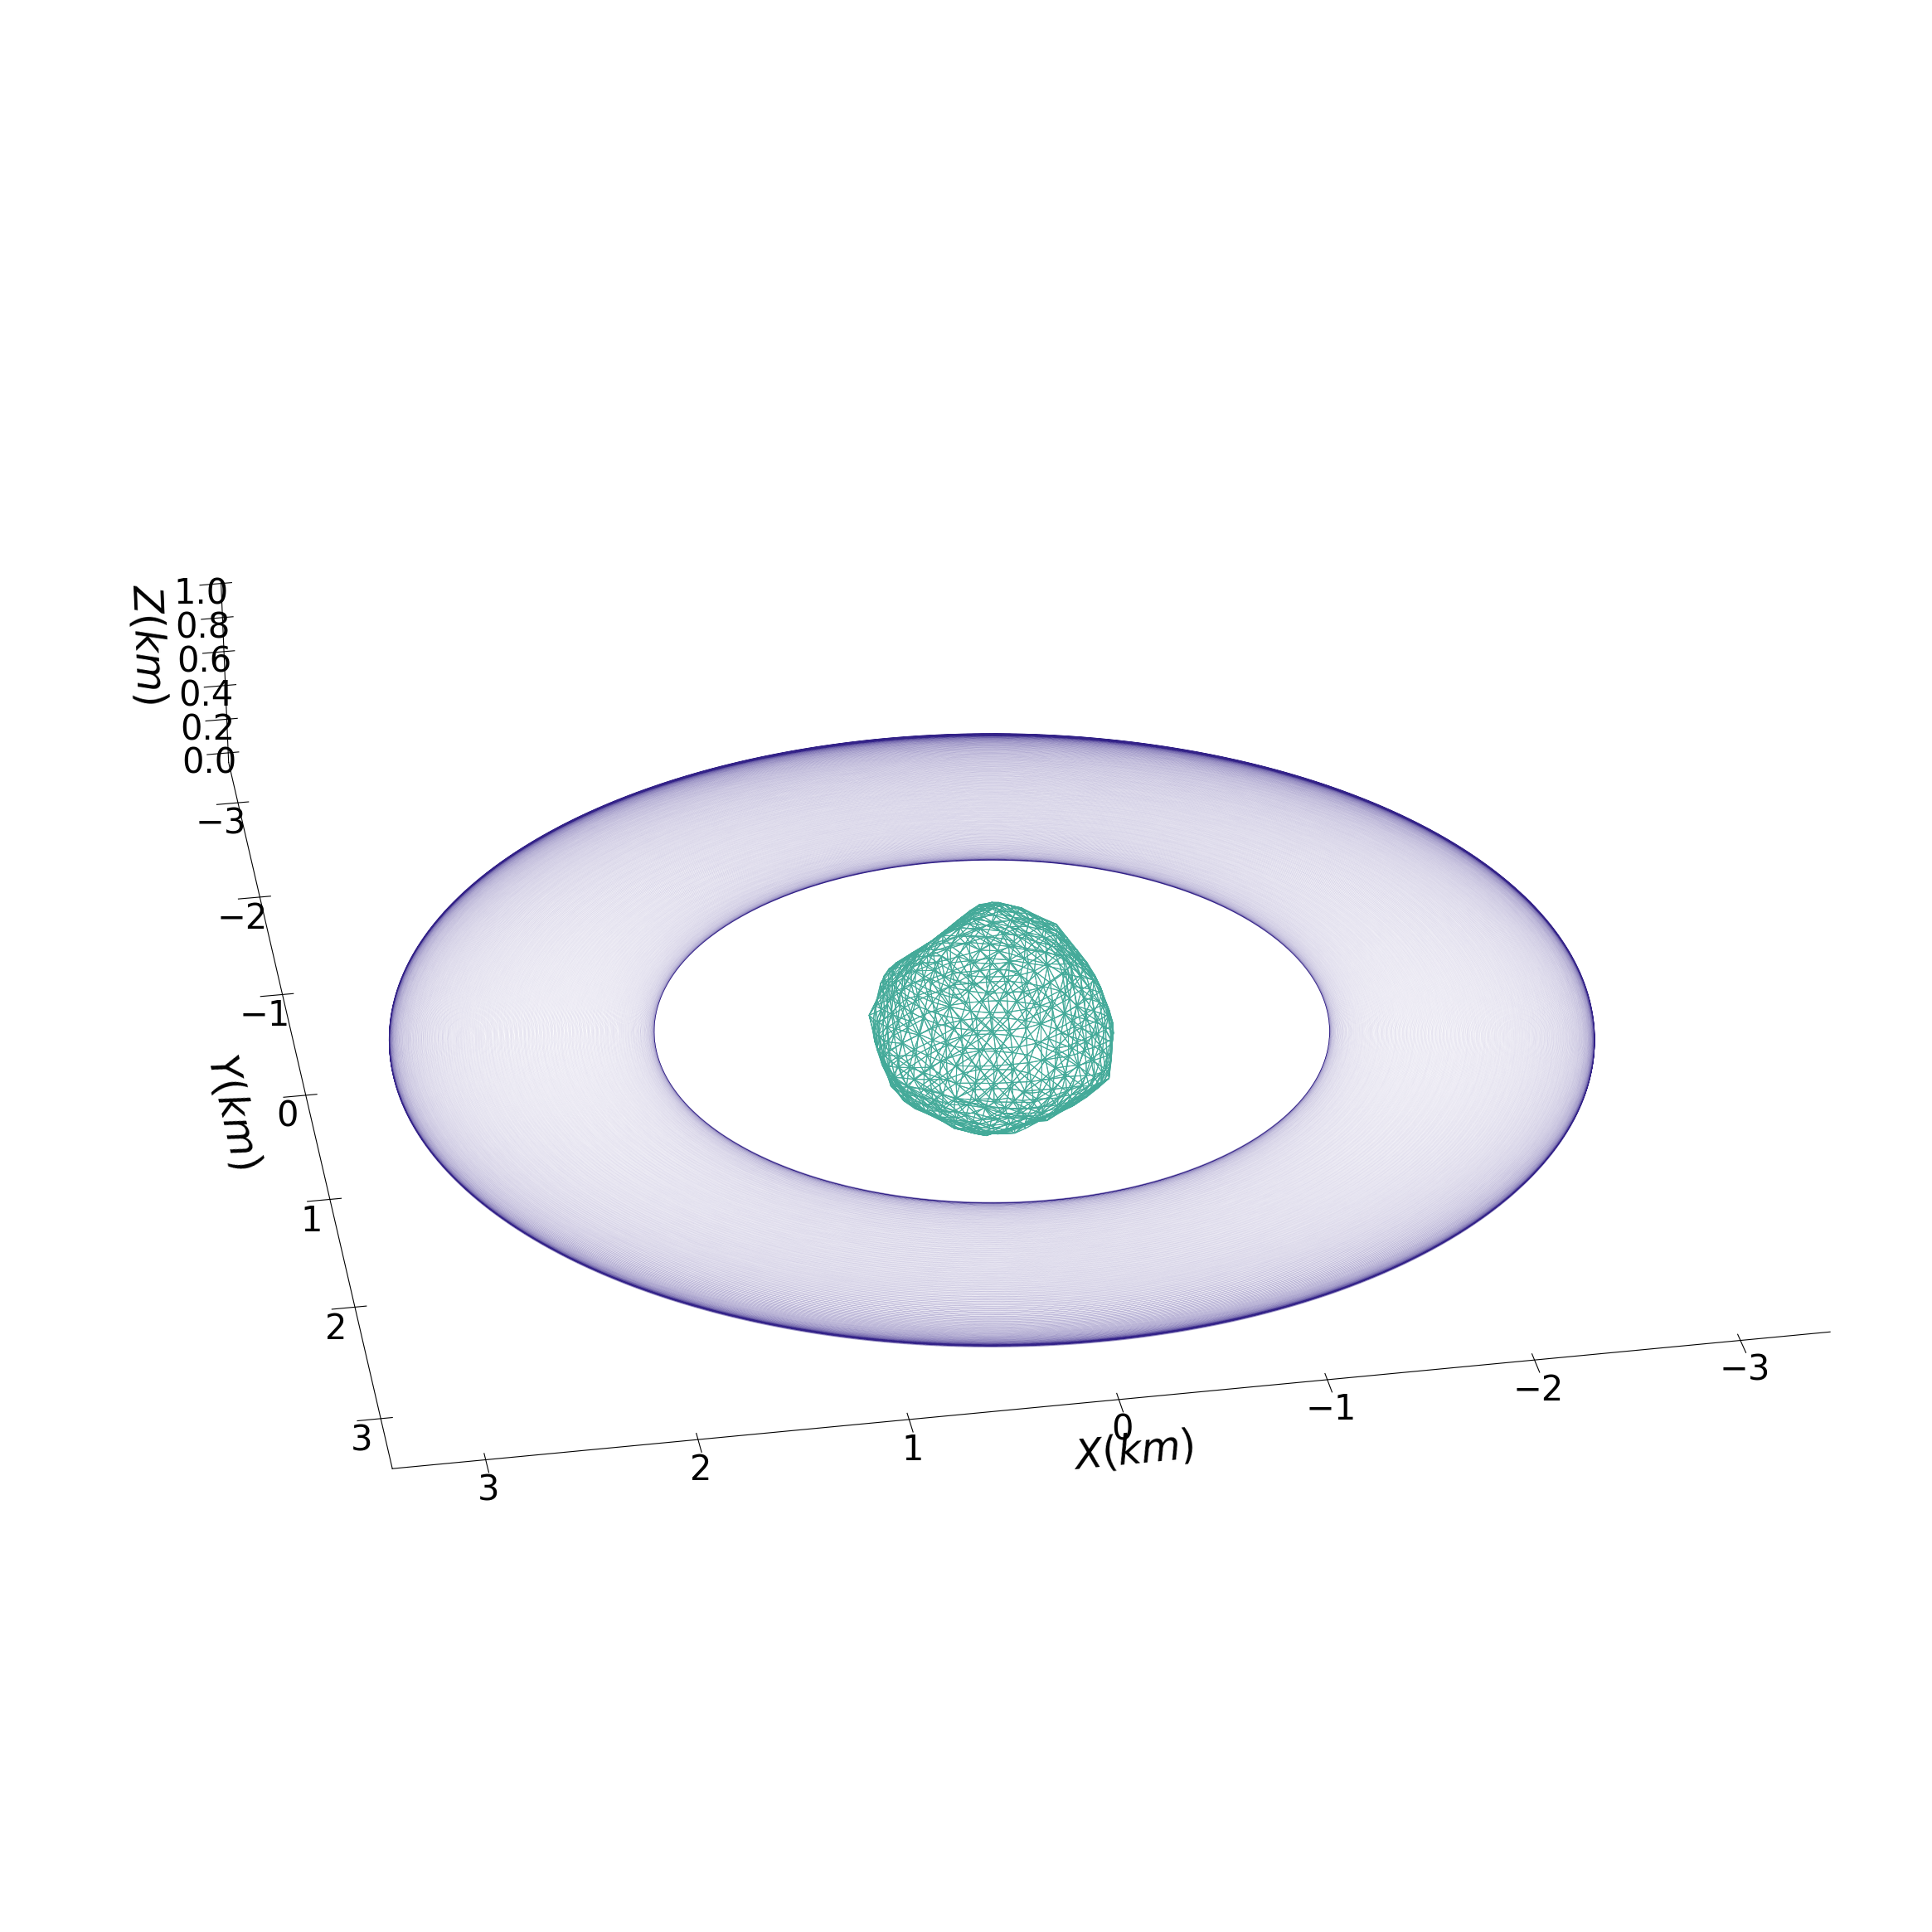

In [33]:
plot_Single(NEW_Bound)

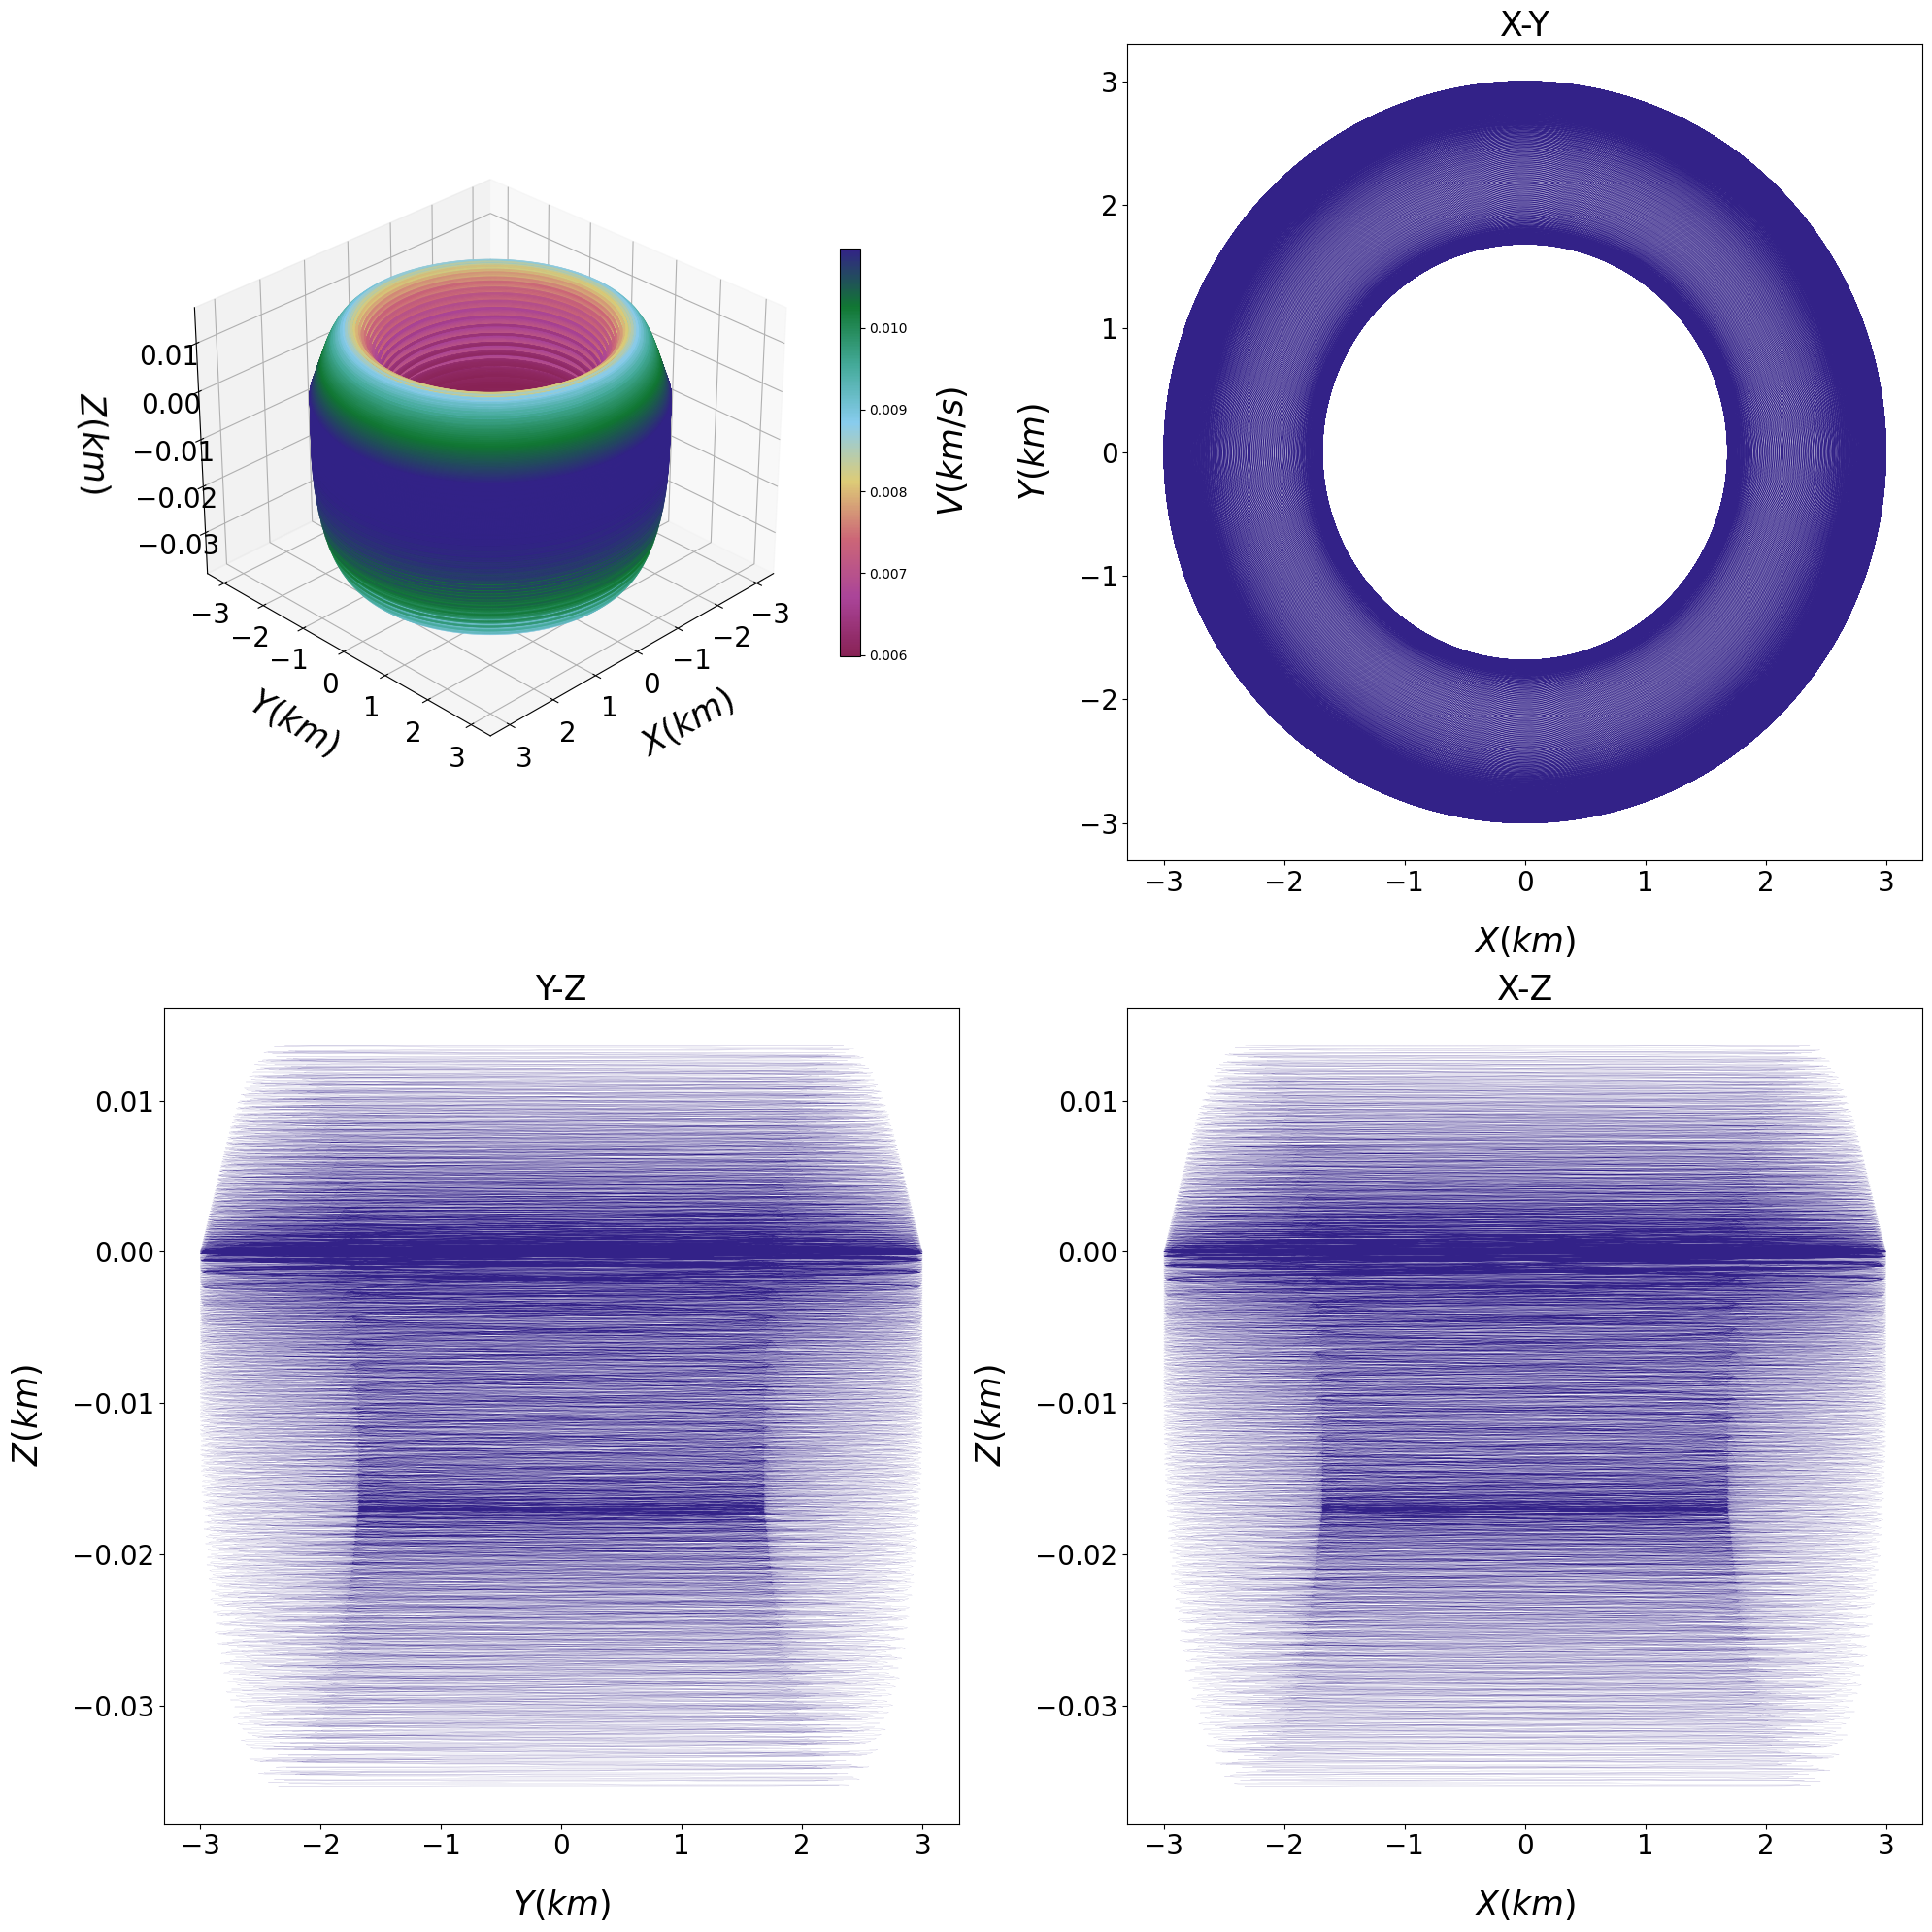

In [36]:
plot_4by4(NEW_Bound)

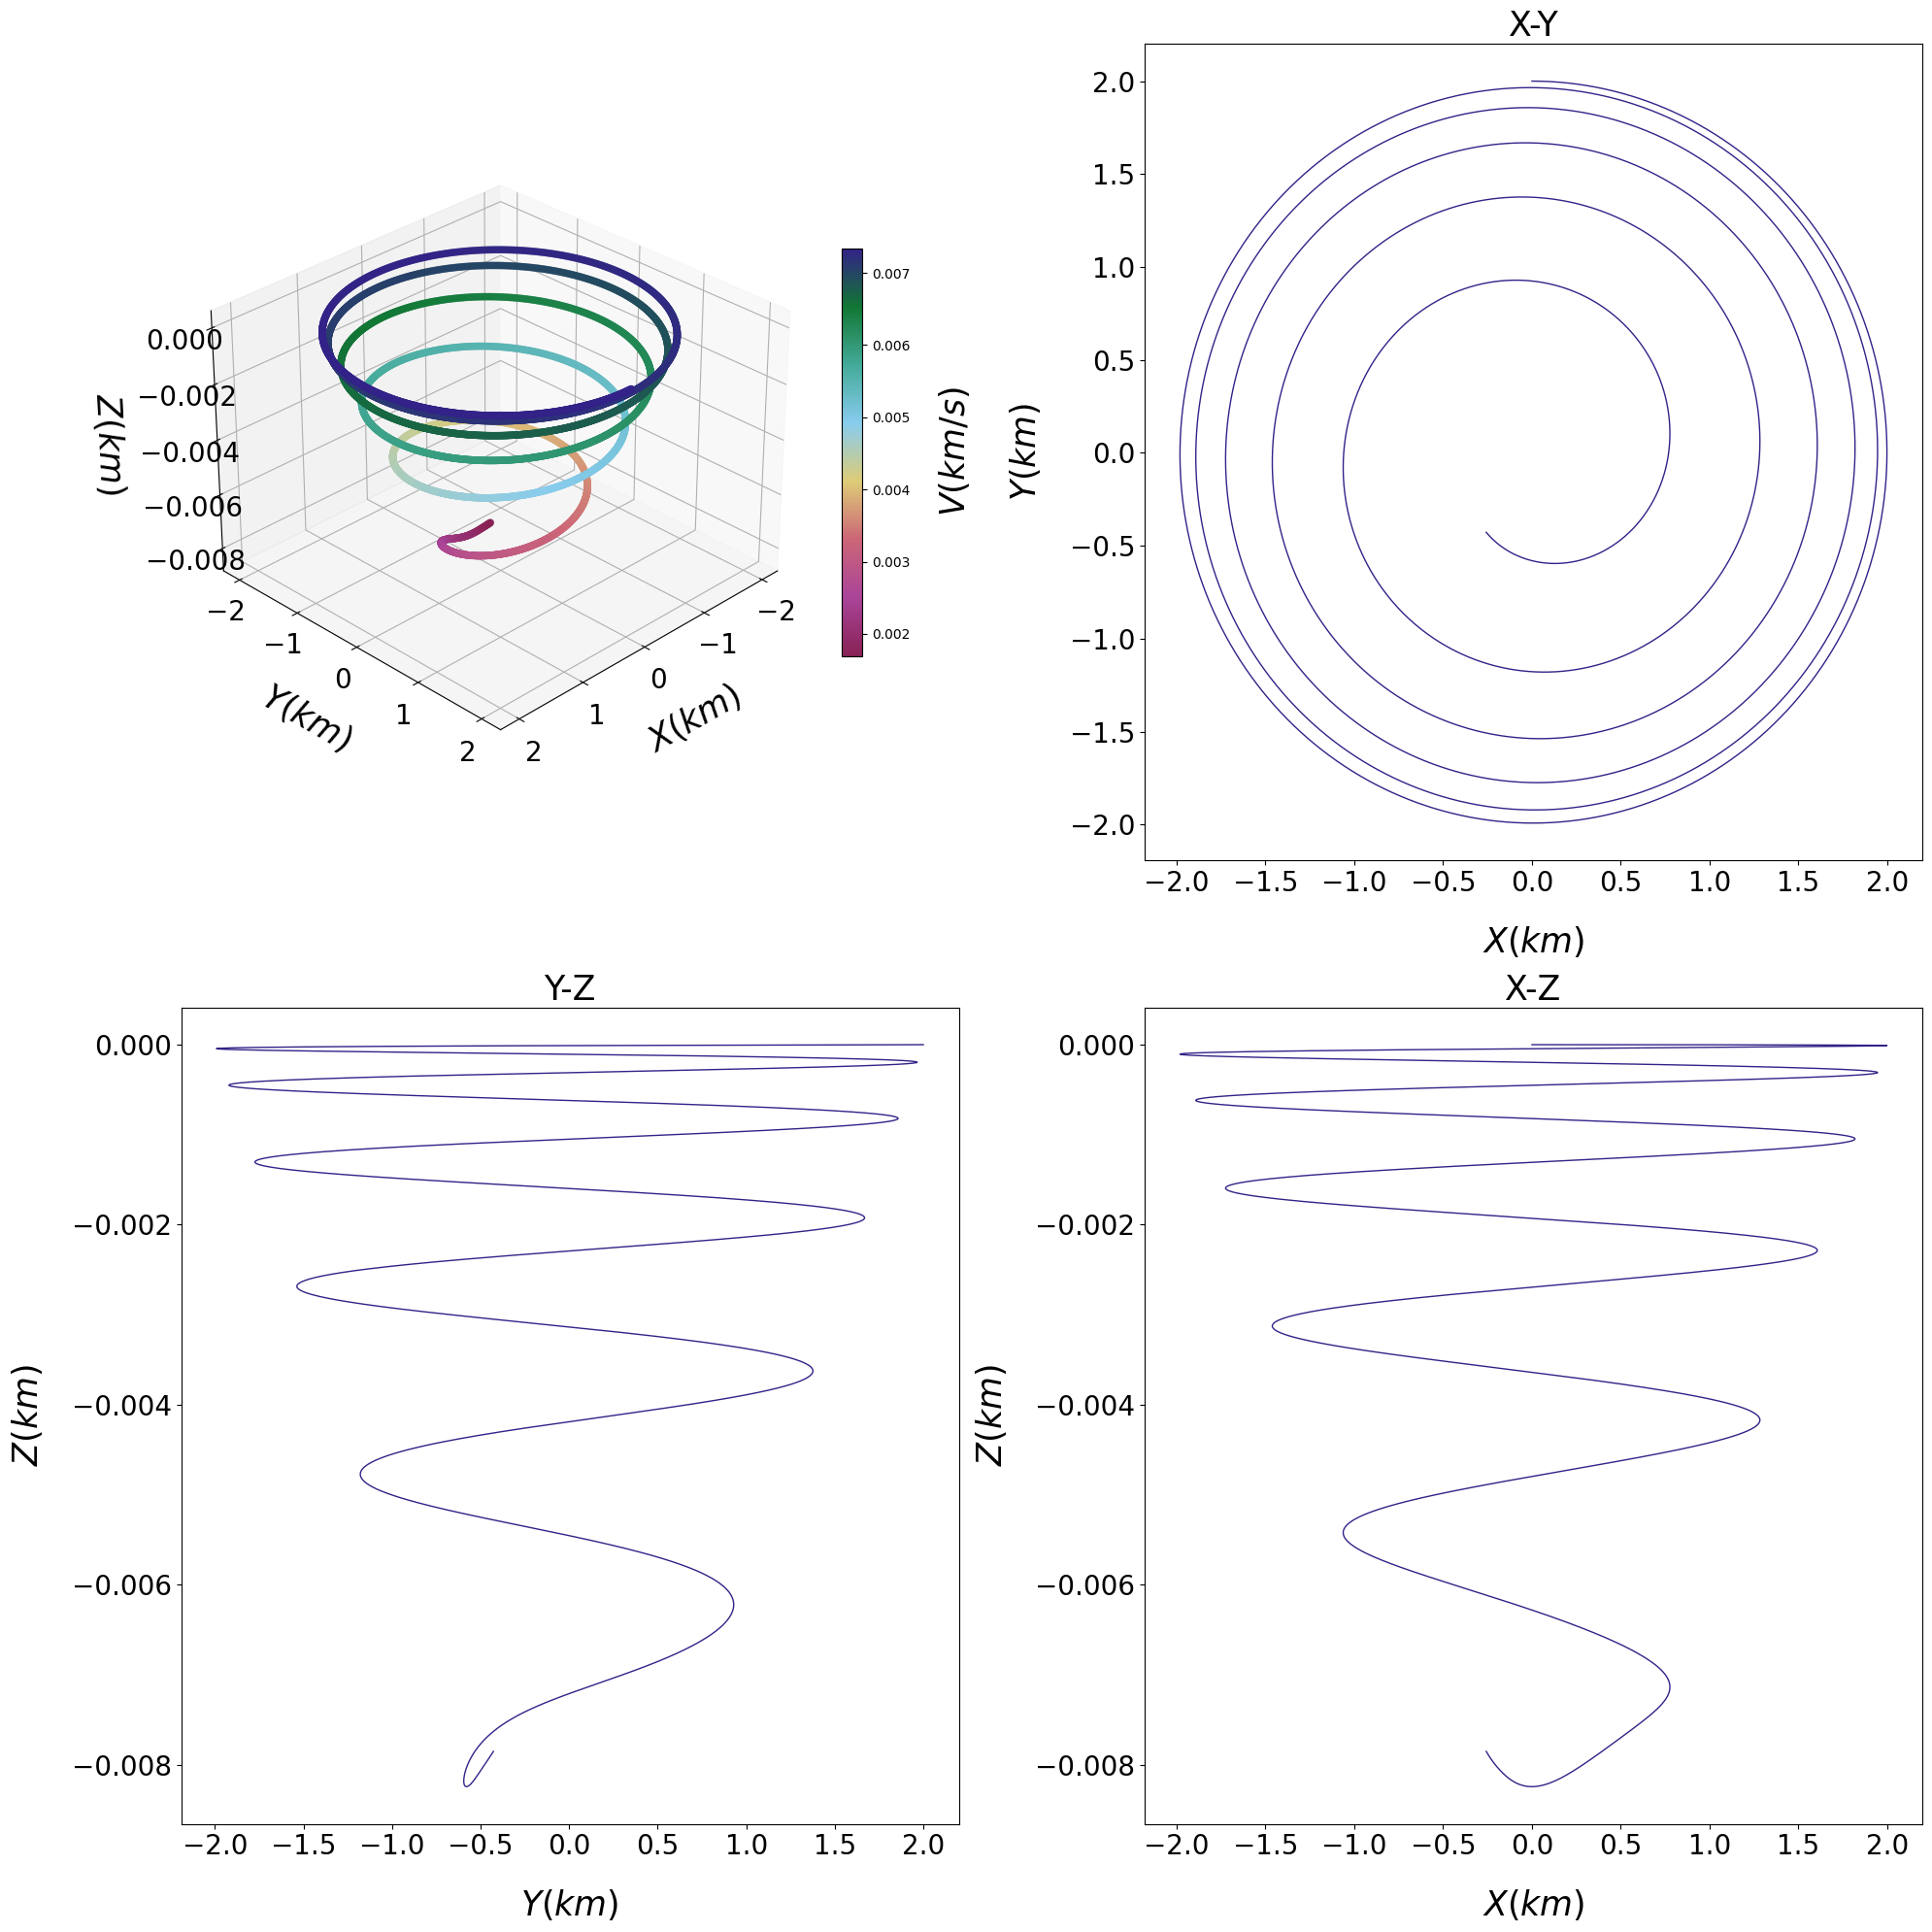

In [34]:
plot_4by4(Collision)

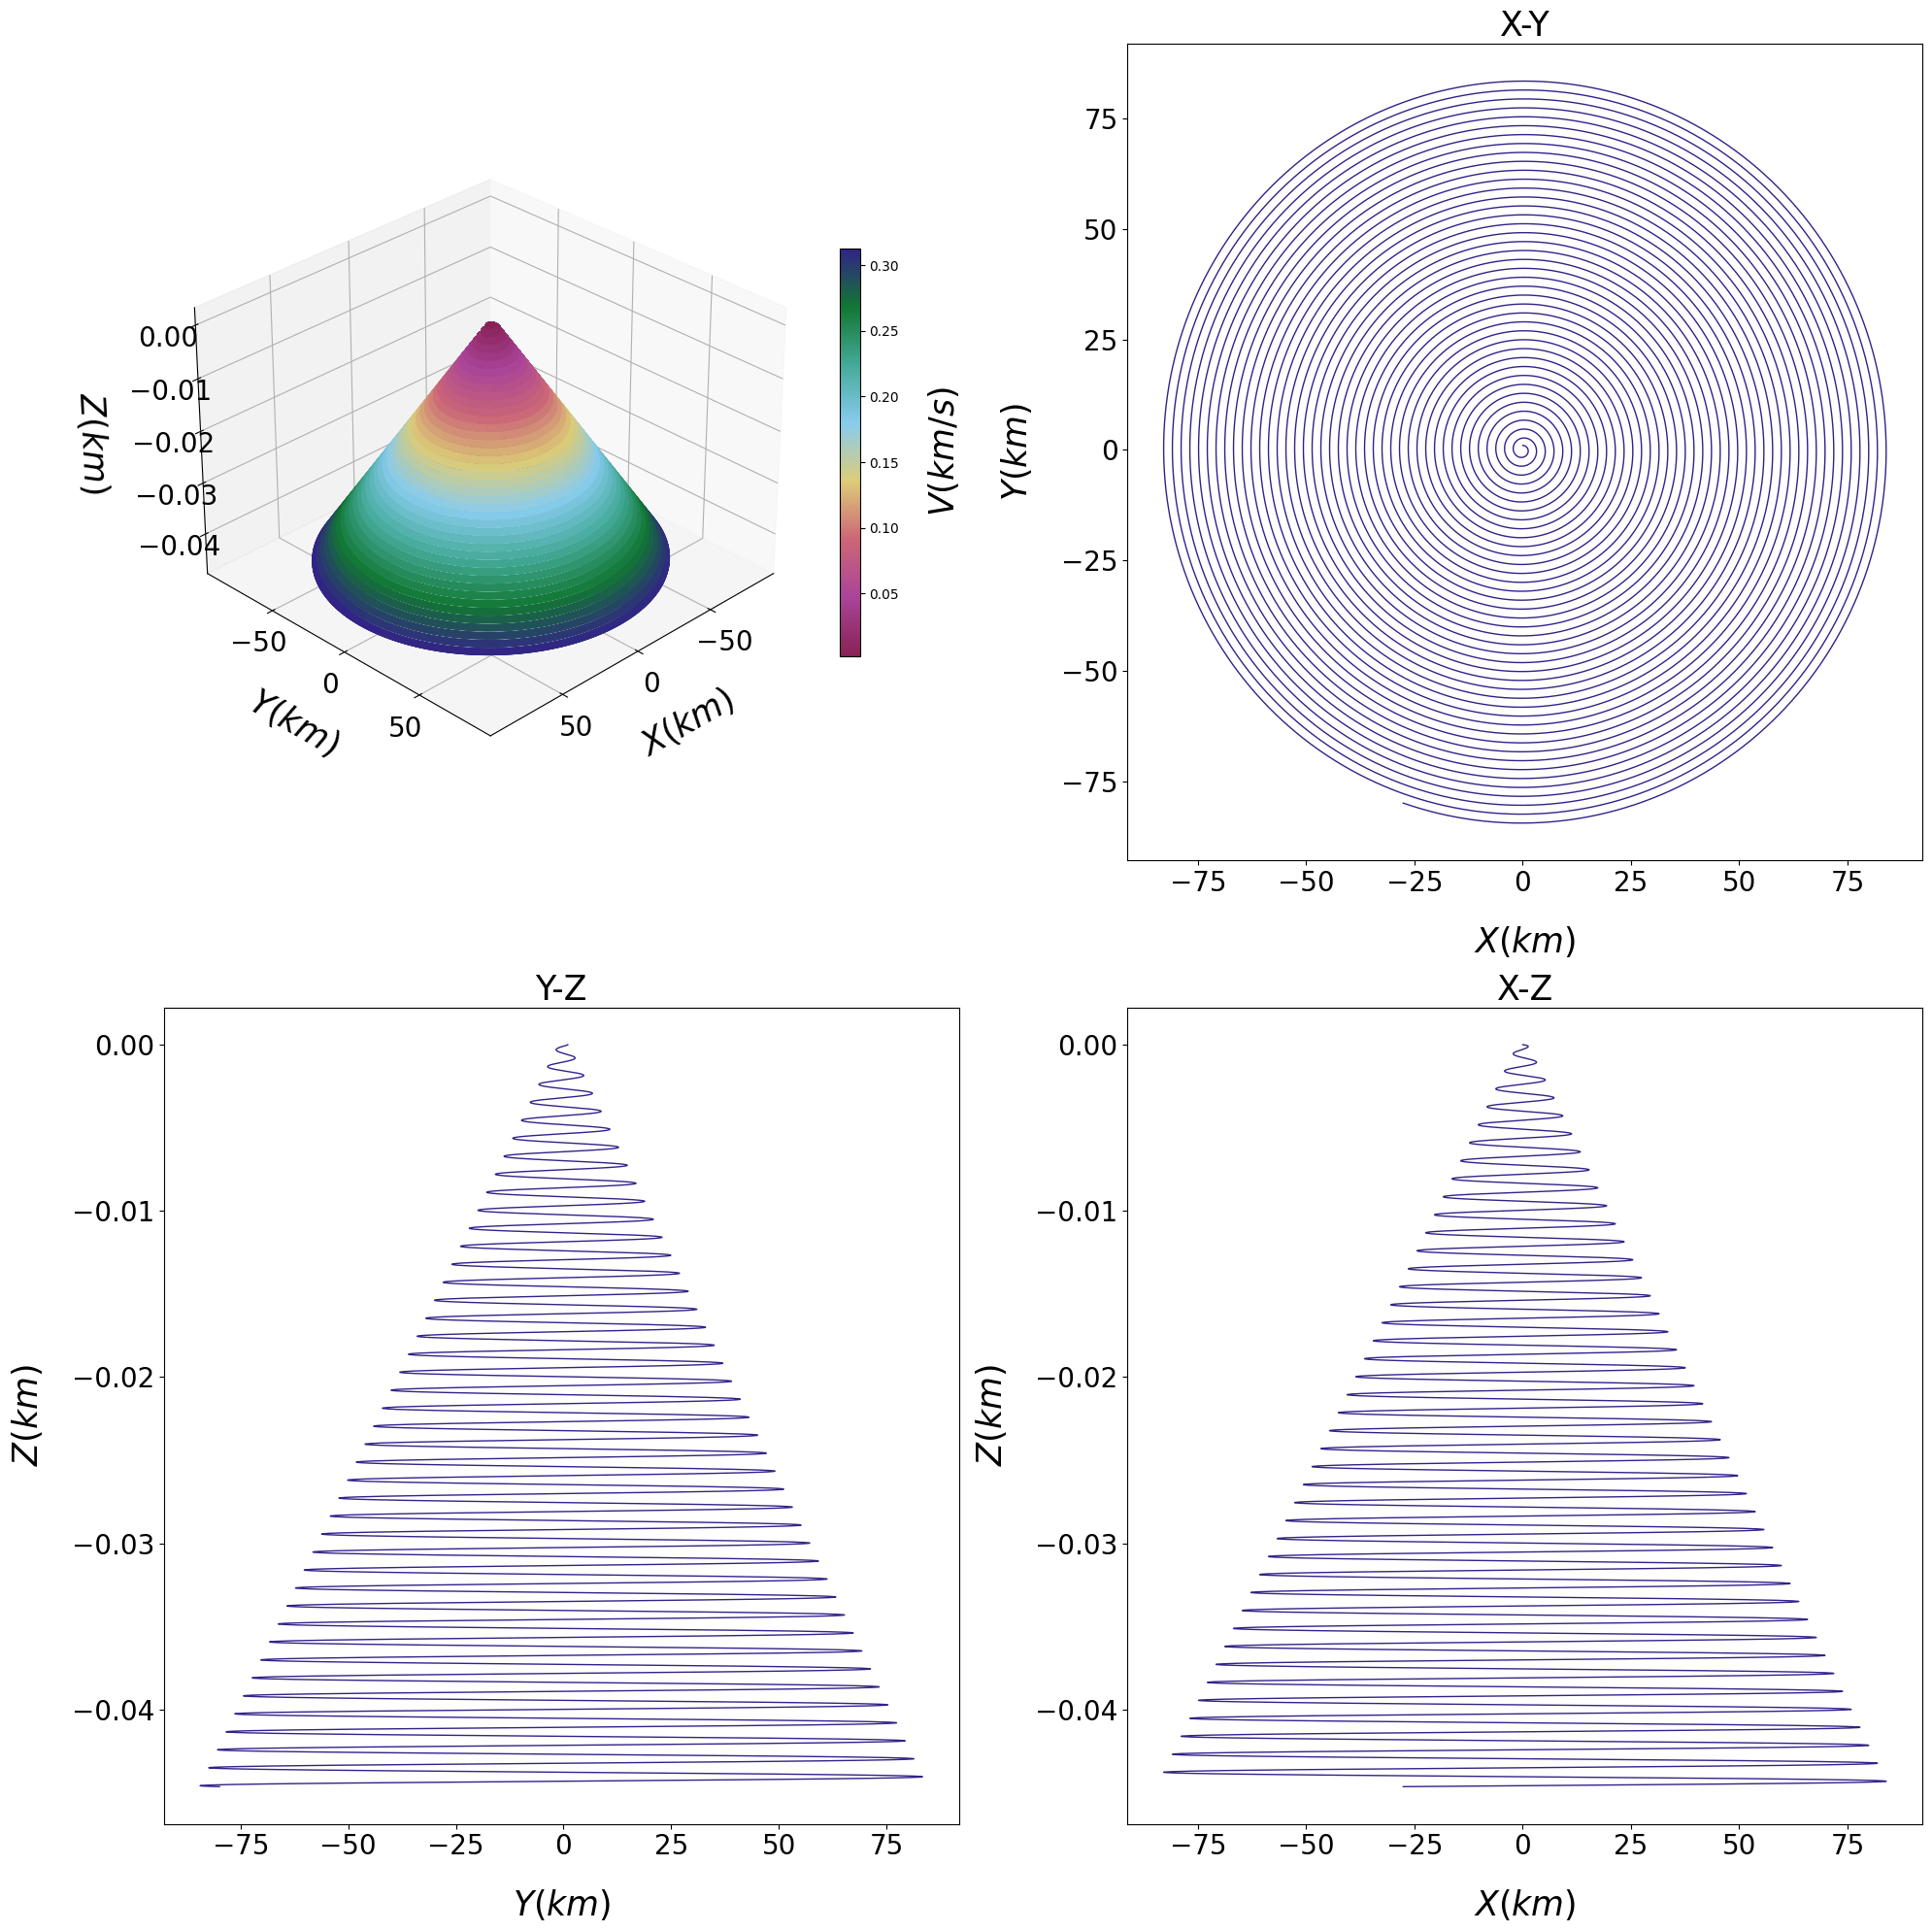

In [35]:
plot_4by4(Escape)